<a href="https://colab.research.google.com/github/DiGyt/cateye/blob/main/example_minimal_use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CatEye: Minimal Use
_by Dirk Gütlin_

In this notebook, I will give you a minimal use case of the CatEye workflow including a simple example on how to classify  and later visualize Eyetracking data. For a quick start, you can simply click on the button above to open this notebook in Google Colab, run it, and play around as you like. For a more in-depth tutorial, check the example_pandas_workflow notebook.


First of all, we have to install the CatEye library. If you have the library already installed in your environment, you can skip this cell.

In [1]:
# pip install the cateye library from a bash command
!pip install git+https://github.com/DiGyt/cateye.git -q

Now, let's import all the libraries we need.

In [2]:
# import data
import numpy as np
import matplotlib.pyplot as plt

from cateye import (sfreq_to_times, classify_nslr_hmm, continuous_to_discrete,
                    plot_segmentation, plot_trajectory)
from cateye import sample_data_path

Let's load our data. To demonstrate how low level CatEye's data access is, we will simply work with 3 1-D arrays of equal length. One array contains the sampling times, one the x and one the y gaze coordinates. We could event work with simple Python lists here.

In [3]:
# load the example data
data_path = sample_data_path("example_data")
data = np.genfromtxt(data_path, dtype=float, delimiter=',', names=True)
times, x, y = data["Timestamp"], data["Theta"], data["Phi"]

If we don't have a sampling times array for our data, we can create an equally spaced array from the sampling frequency (and the start time if wanted). So, in general, we don't need anything else besides our x and y gaze series and a the sampling times/sampling frequency.

In [4]:
# create a sampling times array from the sampling rate
times = sfreq_to_times(x, sfreq=119., start_time=70.5)

Now let's go ahead and apply some gaze classification on our EyeTracking. Here, we will use the [NSLR-HMM algorithm](https://gitlab.com/nslr/nslr-hmm), which can automatically classify Fixations, Saccades, Smooth Pursuits and Post-saccadic Oscillations. Note that NSLR-HMM requires the data to converted to degrees. Our current data is defined as radians, therefore we can easily convert it into the degree format using the `numpy.rad2deg` function. In order for different classifiers to work please always make sure to convert your data to the required unit. You can convert screen cordinates to degrees using the `cateye.pixel_to_deg` function.

In [5]:
# convert the our radian data to degrees
x_deg = np.rad2deg(x)
y_deg = np.rad2deg(y)

# classify the data using NSLR-HMM
segment_id, segment_class = classify_nslr_hmm(x_deg, y_deg, times, optimize_noise=False)

/net/store/nbp/projects/MindQ/programming_tools/miniconda3/envs/mne/lib/python3.7/site-packages/nslr_hmm/nslr_hmm.py:301: RuntimeWarning: invalid value encountered in true_divide
  direction = speed/velocity
/net/store/nbp/projects/MindQ/src/CatEye/cateye/utils.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indices[selected] = cur_idx
/net/store/nbp/projects/MindQ/src/CatEye/cateye/utils.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  values[selected] = dis_val


Note that in CatEye there are two data formats: The "continuous" format (with which we have been working so far) and the "discrete" format. Arrays of the continuous format have one element for each sample and can directly be mapped onto our `times` array (like `x`, `y`, `segment_id`, and `segment_class`). The discrete format describes annotations which occur at discrete timepoints during the course of our recording. It can be more useful for events, segments, and during plotting. We can always translate between the "continuous"  and "discrete" format by using `cateye.discrete_to_continuous` and `cateye.continuous_to_discrete`. You can get more intuition on the ues of both formats in our example_pandas_workflow notebook.

Here, we will convert our classification segments from continuous to discrete as the discrete format is required for our plotting function. We could also directly return the discrete format by passing `return_discrete=True` to the classification function.

In [6]:
# convert continuous ids and descriptions to discrete timepoints and descriptions
(seg_time, seg_class) = continuous_to_discrete(times, segment_id, segment_class)

Let's visualize NSLR's classification using our `plot_segmentation` function. This time, we won't pass the discrete event markers, but instead colour different segments of the time course according to the predicted class.

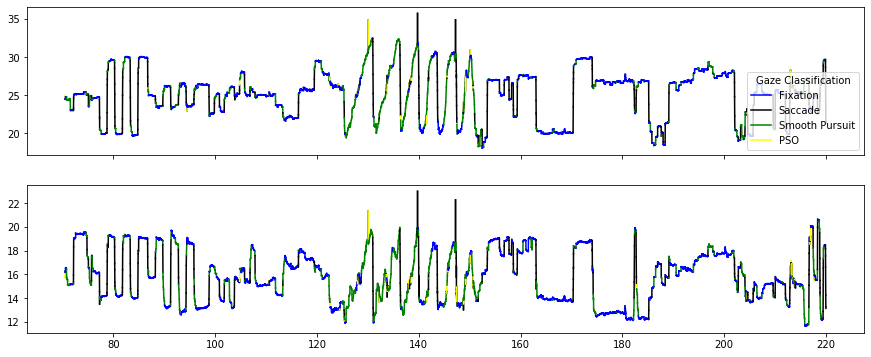

In [7]:
# plot the classification results
fig, axes = plt.subplots(2, figsize=(15, 6), sharex=True)
plot_segmentation(x_deg, times, segments=(seg_time, seg_class), events=None, ax=axes[0])
plot_segmentation(y_deg, times, segments=(seg_time, seg_class), events=None, ax=axes[1],
                  show_legend=False);

CatEye also provides a plotting function for visualizing the eve movement trajectory. Similar to the `cateye.plot_segmentation` function, we can color single segments of our trajectory with the corresponding label color.

For clearer visualization, we will only plot the first 900 samples of our data.

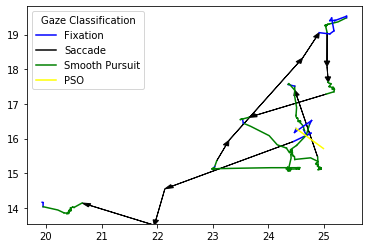

In [8]:
# plot trajectory
plot_trajectory(x_deg[:900], y_deg[:900], times[:900], segments=(seg_time, seg_class));